# easy_ViTPose demo
Be sure to enable GPU runtime

In [ ]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
!cd easy_ViTPose/ && pip install -r requirements.txt
!pip install huggingface_hub
!pip install onnx onnxruntime-gpu

Cloning into 'easy_ViTPose'...
remote: Enumerating objects: 522, done.
remote: Counting objects: 100% (522/522), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 522 (delta 302), reused 473 (delta 267), pack-reused 0
Receiving objects: 100% (522/522), 3.91 MiB | 11.25 MiB/s, done.
Resolving deltas: 100% (302/302), done.
Branch 'tracking' set up to track remote branch 'tracking' from 'origin'.
Switched to a new branch 'tracking'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 118.7 MB/s eta 0:00:00
     ━

# Restart the runtime (runtime -> restart runtime) to update installed packages versions

# Download the models

In [ ]:
#@title Choose model and run this cell
#@markdown Only ONNX and torch models here

MODEL_TYPE = 'onnx'  #@param ["onnx", "torch"]
MODEL_SIZE = 'l'  #@param ['s', 'b', 'l', 'h']
YOLO_TYPE = 'onnx'  #@param ['onnx', 'torch']
YOLO_SIZE = 's'  #@param ['s', 'n']
ext = {'tensorrt': '.engine', 'onnx': '.onnx', 'torch': '.pth'}[MODEL_TYPE]
ext_yolo = {'onnx': '.onnx', 'torch': '.pt'}[YOLO_TYPE]

In [ ]:
import os
import sys
from huggingface_hub import hf_hub_download
sys.path.append('easy_ViTPose/src')
REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, 'vitpose-25-' + MODEL_SIZE) + ext
FILENAME_YOLO = 'yolov5/yolov5' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

# Run inference

In [ ]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
from inference import VitInference
model = VitInference(model_path, yolo_path, MODEL_SIZE,
                     yolo_size=320, is_video=False)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-27 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /root/.cache/huggingface/hub/models--JunkyByte--easy_ViTPose/snapshots/2e599f9067ef175c7e270bafca586d1cf8d3f9df/yolov5/yolov5s.onnx for ONNX Runtime inference...
Adding AutoShape... 


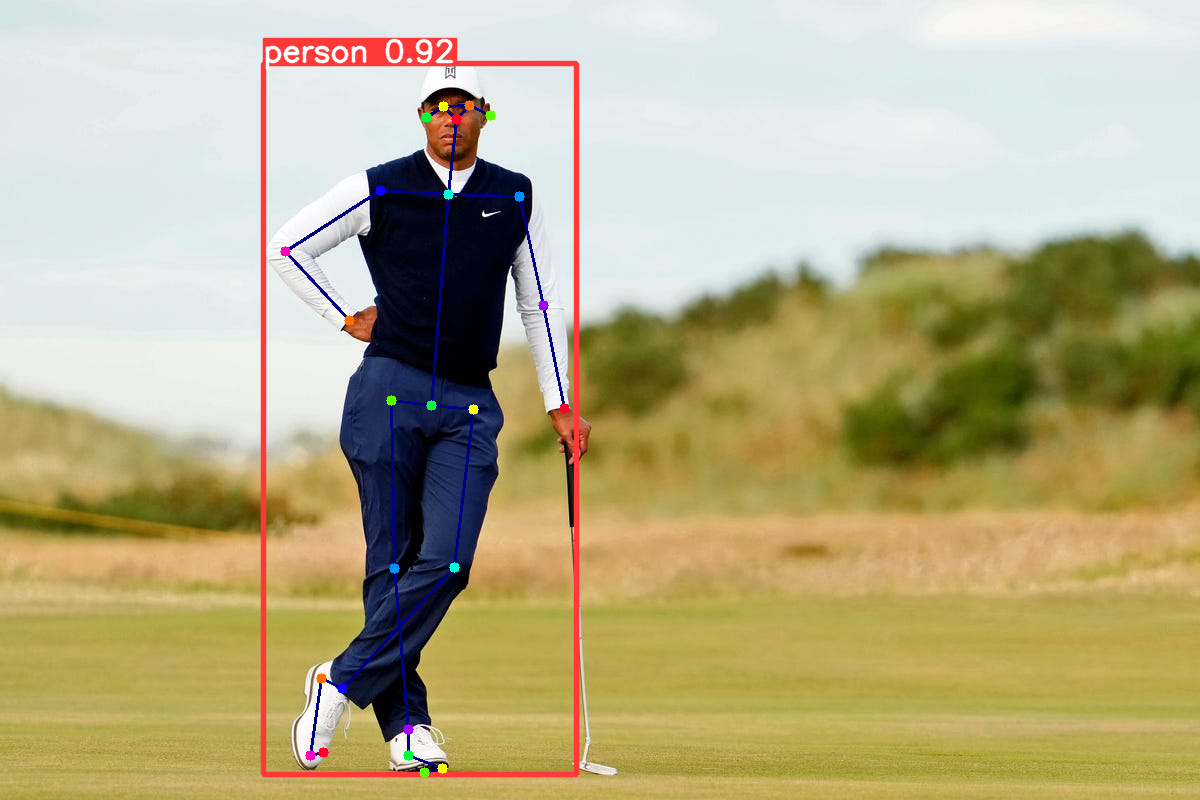

In [ ]:
# Run inference on example image
import numpy as np
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

# Load image and run inference
url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open(BytesIO(urlopen(url).read())), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])

Saving img1.jpg to img1 (1).jpg


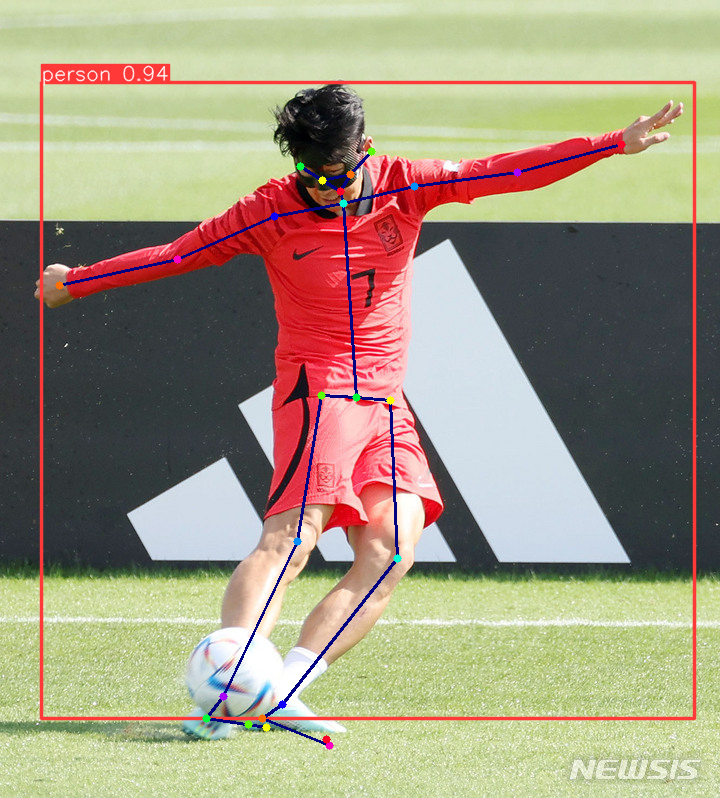

In [ ]:
#@title Custom image
from google.colab import files
import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])